La mia libreria Billy...
=============
http://www.ikea.com/it/it/catalog/products/00263850/  
Il progetto è andato avanti in maniera scalare, partendo da la bookshelf Billy e creando poi nuovi metodi per semplici comodini e TV.  
Nell'ultimo frammento di codice si mettono insieme i vari elementi formando un ipotetico arredamento.  
Tutti i metodi sono parametrici, permettendo costruzioni di grandezza variabile. Anche il colore degli oggetti deve essere passato al metodo, in modo da permettere una personalizzazione totale!

In [1]:
from larlib import *

Evaluating fenvs.py..
...fenvs.py imported in 0.006047 seconds


In [22]:
def billy(n,m,k,r,g,b):
    """
    Return a HPC object representing a Billy bookshelf.
    n: # of columns
    m: # of rows
    k: depth
    r,g,b: color
    """
    xRithm = [0.7, -15]*n
    xRithm.append(0.7)
    yRithm = [-5, 0.7]*m
    yRithm.append(-1.5)
    yRithm = yRithm[::-1]
    yRithm.append(0.7)
    xVoid = [ -x for x in xRithm ]
    yVoid = [ -y for y in yRithm ]
    zRithm = [k]
    temp1 = PROD([PROD([QUOTE(xRithm), QUOTE(yRithm)]), QUOTE(zRithm)])
    temp2 = PROD([PROD([QUOTE(xVoid), QUOTE(yRithm)]), QUOTE(zRithm)])
    temp3 = PROD([PROD([QUOTE(xRithm), QUOTE(yVoid)]), QUOTE(zRithm)])
    facade = STRUCT([temp1, 
                    temp2, 
                    temp3])
    
    xCoord = (0.7+15)*n + 0.7
    yCoord = (0.7+5)*m + 2.2
    zCoord = 0.7
    backPanel = CUBOID([xCoord, yCoord, zCoord])
    basePanel = CUBOID([xCoord, 1.5, k-0.7])
    CUSTOMCOLOR = Color4f([r,g,b,1.0])
    sumXRithm = (15.7)*n + 0.7
    return T([1,3])([-0.5*sumXRithm, -0.5*k])(STRUCT([COLOR(CUSTOMCOLOR),facade, backPanel, basePanel]))

In [18]:
VIEW(billy(1,6,5,0.75,0.75,0.75))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f757afdff60> >

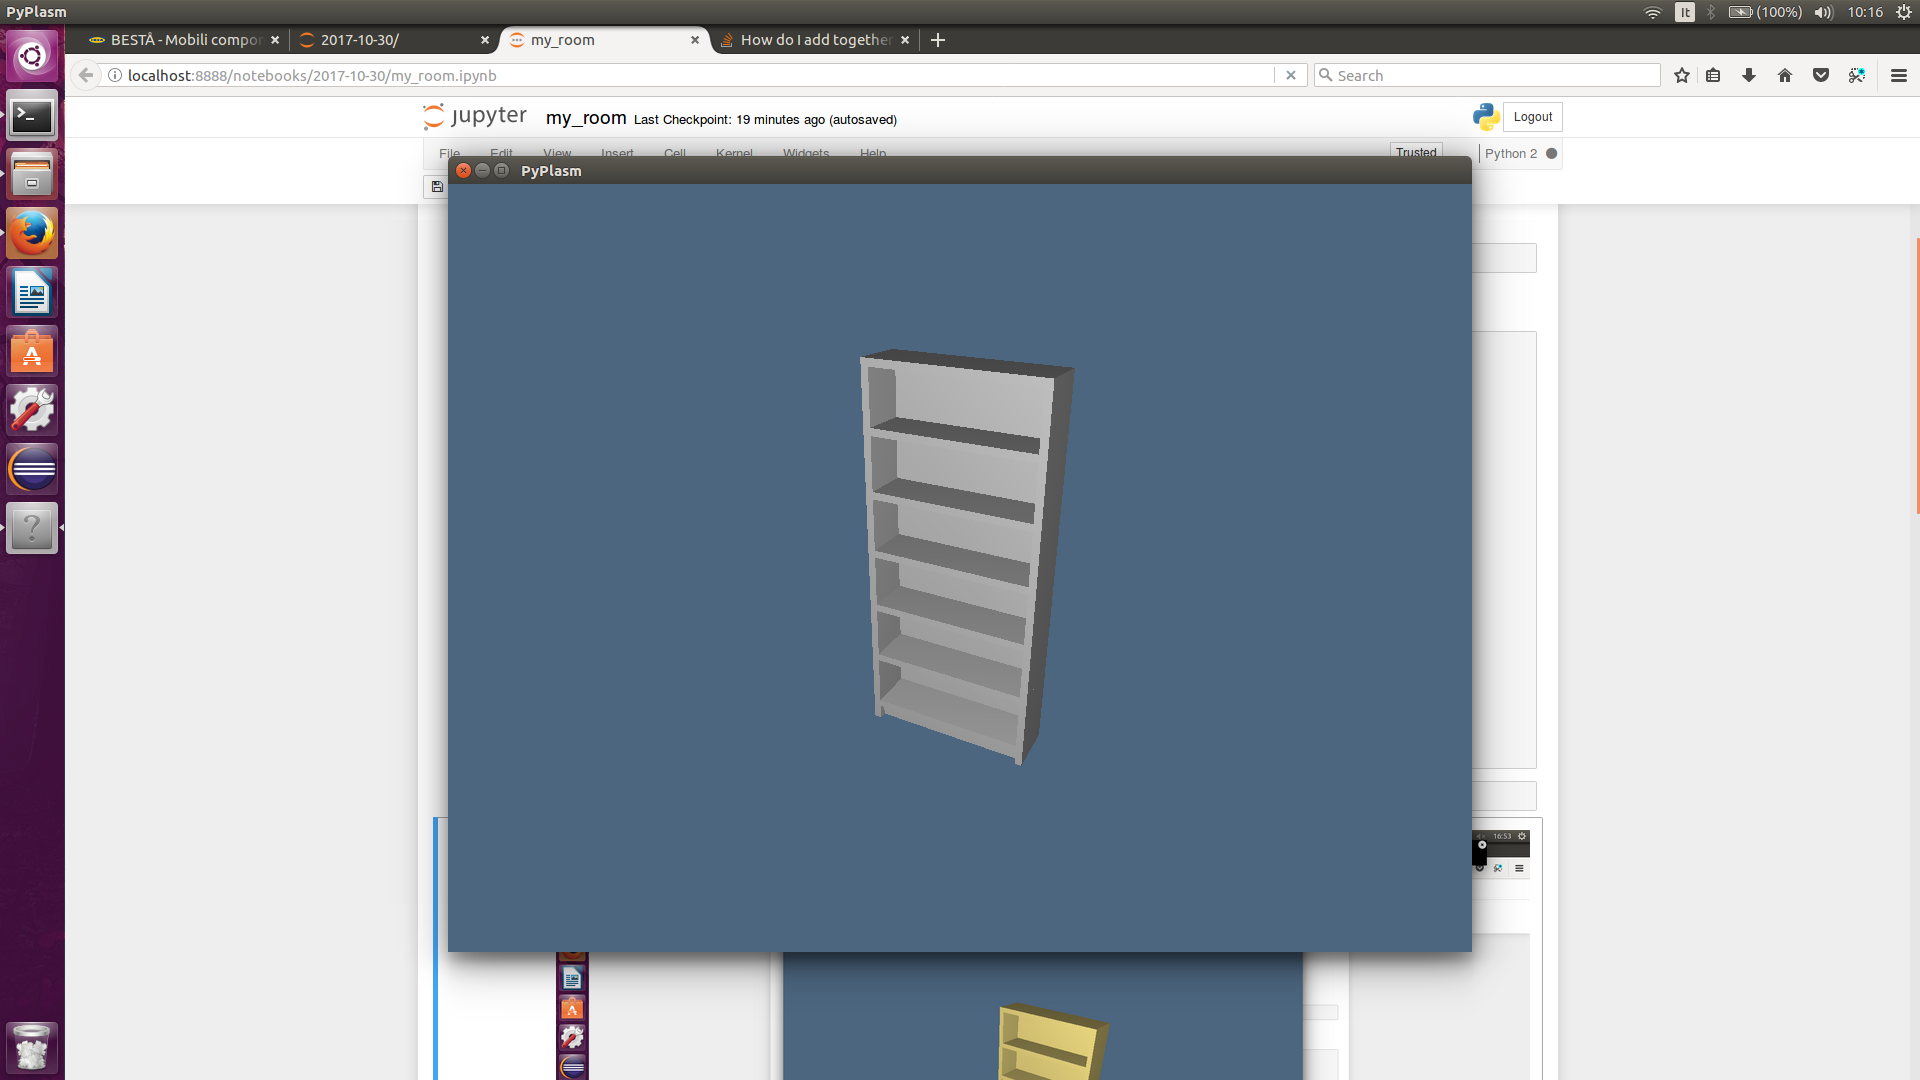

In [4]:
def tv(n):
    """
    Return a HPC object representing a 4:3 TV.
    n: size of the screen
    """
    width = 0.8 * n
    height = 0.6 * n
    baseX = 0.5 * width
    baseY = 0.5
    baseZ = 0.5 * baseX
    base = T([1,3])([-0.5*baseX, -0.5*baseZ])(CUBOID([baseX, baseY, baseZ]))
    poleX = 0.7
    poleY = 0.7
    poleZ = 0.3
    pole = T([1,2,3])([-0.5*poleX, baseY, -0.5*poleZ])(CUBOID([poleX, poleY, poleZ]))
    
    screenX = [0.5, -width, 0.5]
    screenY = [0.5, -height, 0.5]
    screenZ = [0.3]
    xVoid = [ -x for x in screenX ]
    yVoid = [ -y for y in screenY ]
    temp1 = PROD([PROD([QUOTE(screenX), QUOTE(screenY)]), QUOTE(screenZ)])
    temp2 = PROD([PROD([QUOTE(xVoid), QUOTE(screenY)]), QUOTE(screenZ)])
    temp3 = PROD([PROD([QUOTE(screenX), QUOTE(yVoid)]), QUOTE(screenZ)])
    screenBorder = T([1,2,3])([-0.5*(width+1), baseY+poleY, -0.15])(STRUCT([temp1, 
                    temp2, 
                    temp3]))
    
    BLACK = Color4f([0.0, 0.0, 0.0, 1.0])
    SCREENBLACK = Color4f([0.2, 0.2, 0.2, 1.0])
    
    tvBorder = STRUCT([COLOR(BLACK), base, pole, screenBorder])
    
    screen = T([1,2,3])([-0.5*width, baseY+poleY+0.5, -0.05])(CUBOID([width, height, 0.1]))
    
    return STRUCT([tvBorder, COLOR(SCREENBLACK), screen])

In [ ]:
VIEW(tv(10))

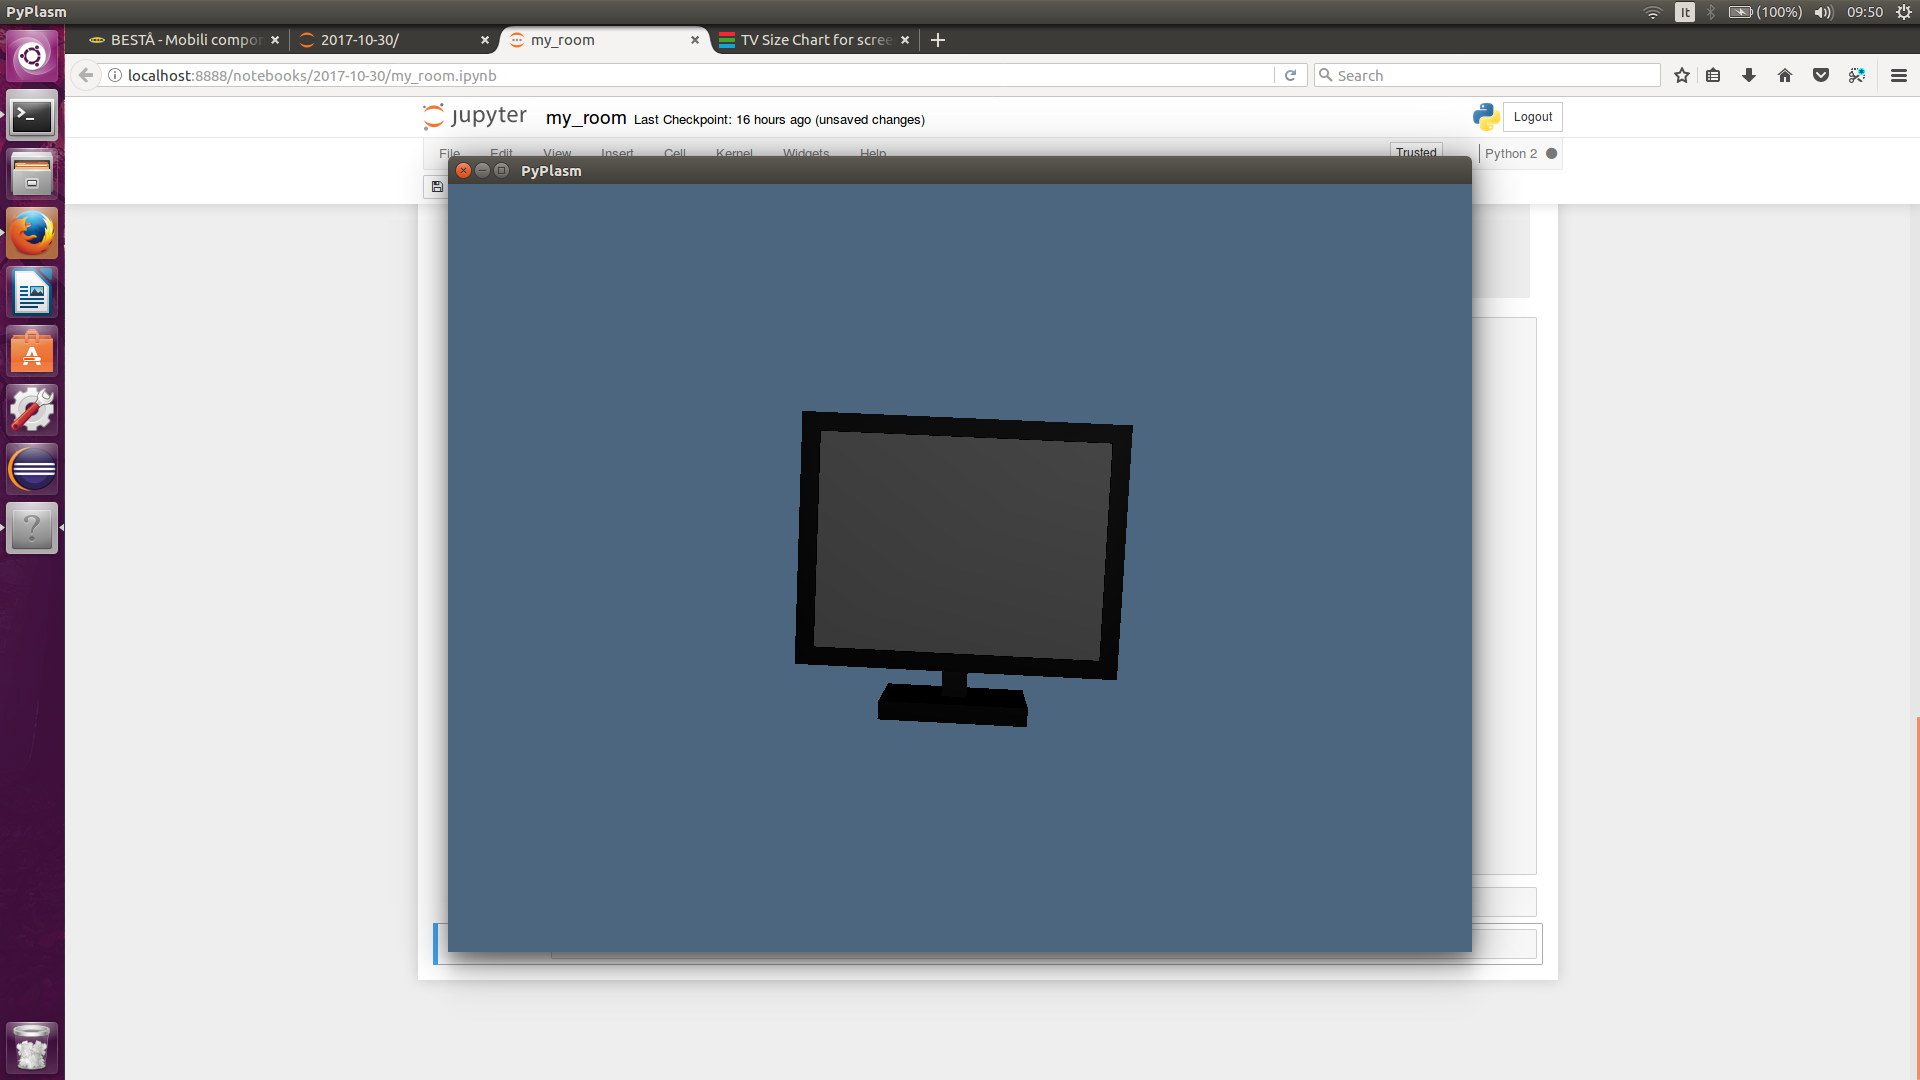

In [15]:
def comodino(n,m,k,r,g,b):
    """
    Return an HPC object representing a cabinet.
    n,m,k: x,y,z dimensions
    rgb: color
    """
    base = T([1,3])([-0.5*n, -0.5*k])(CUBOID([n, m, k]))
    handle = T([1,2,3])([0.5*n-0.75, 0.5*m-0.15, 0.5*k])(CUBOID([0.3,0.3,0.2]))
    PRIMERCOLOR = Color4f([r,g,b,1.0])
    if (r<0.4) and (g<0.4) and (b<0.4):
        cr = 1-r
        cg = 1-g
        cb = 1-b
    else:
        cr = 0.5*r
        cg = 0.5*g
        cb = 0.5*b
    HANDLECOLOR = Color4f([cr, cg, cb, 1.0])
    return STRUCT([COLOR(PRIMERCOLOR), base, COLOR(HANDLECOLOR), handle])

In [42]:
VIEW(comodino(3,3,2,1.0,1.0,1.0))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f7579efe120> >

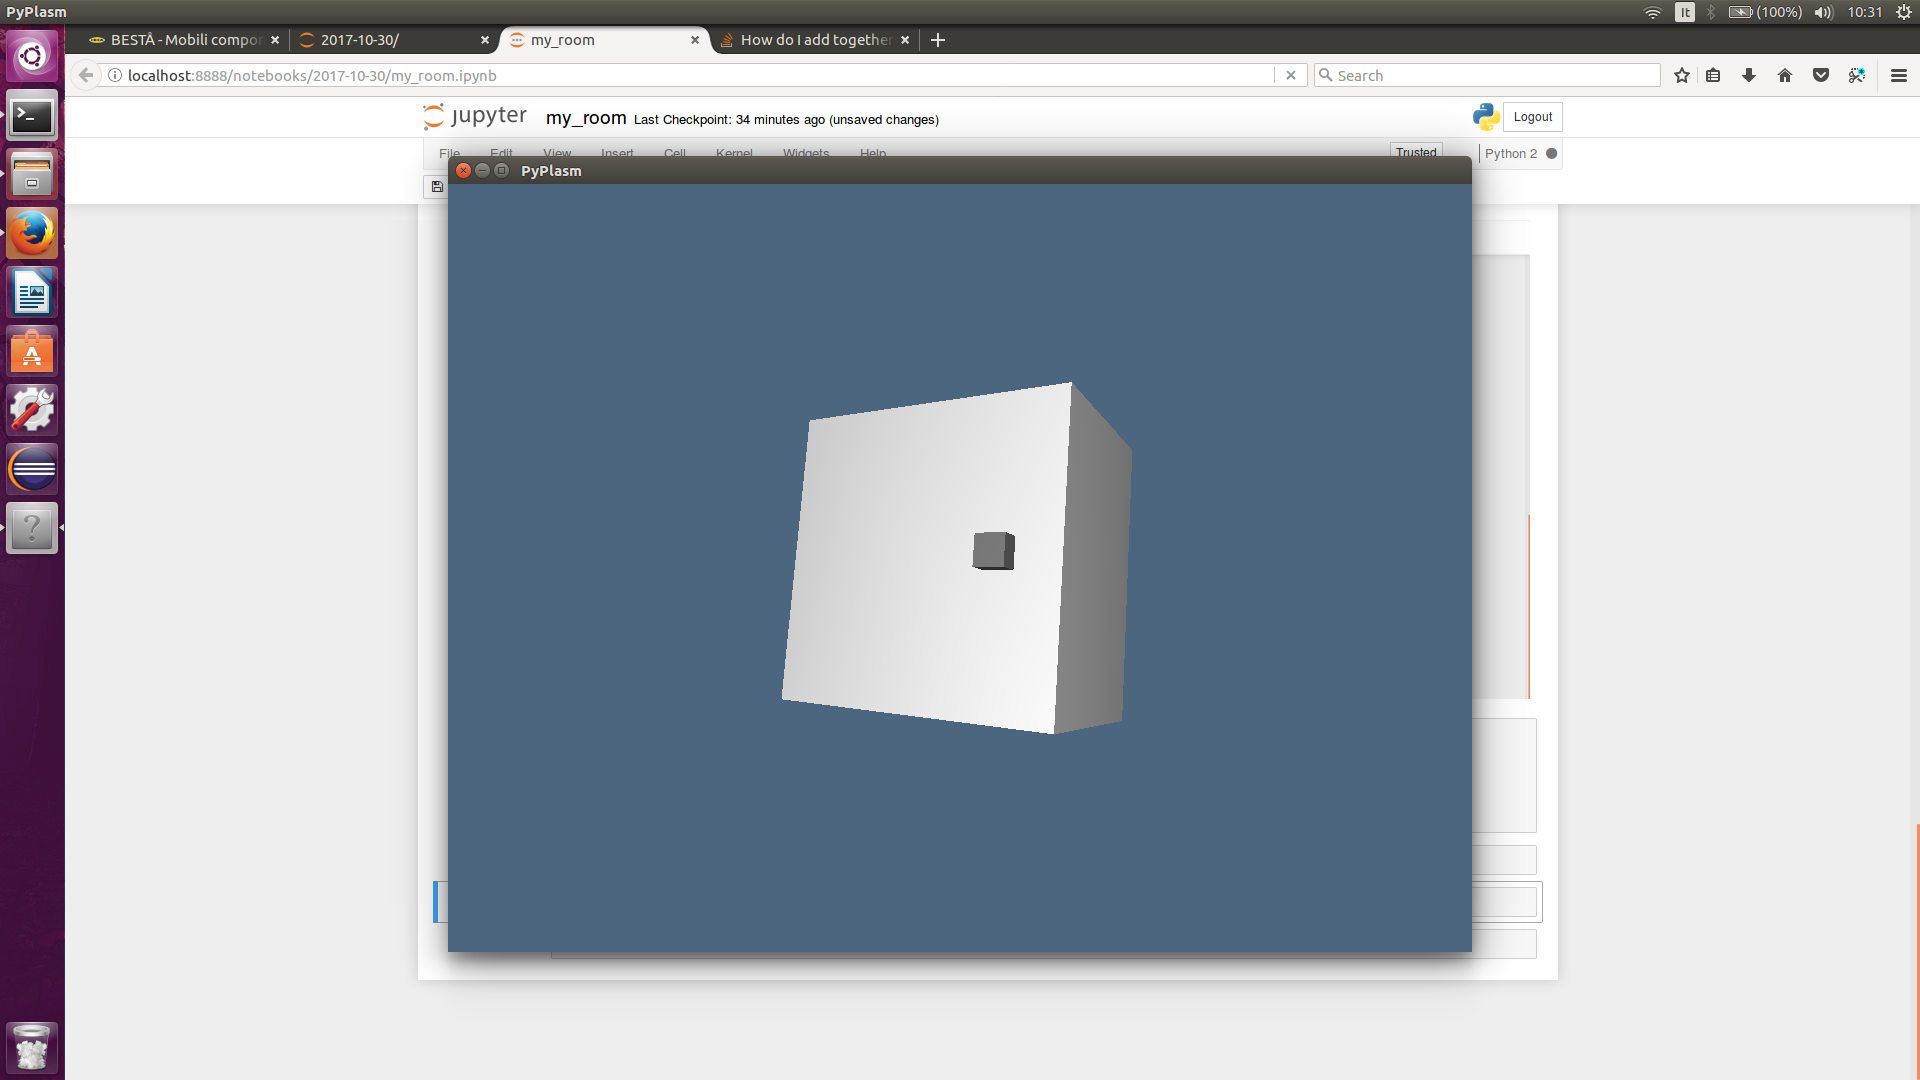

In [21]:
# Proviamo a mettere tutto insieme!
obj1 = billy(1,6,4,0.95,0.95,0.95)
obj2 = T(1)(12.2)(comodino(8,8,4,0.05,0.05,0.05))
obj3 = T(1)(20.2)(comodino(8,8,4,0.95,0.95,0.95))
obj4 = T(1)(28.2)(comodino(8,8,4,0.05,0.05,0.05))
obj5 = T([1,2])([28.2,28.4])(comodino(8,8,4,0.95,0.95,0.95))
obj6 = T(1)(40.4)(billy(1,6,4,0.95,0.95,0.95))
obj7 = T([1,2])([20.8,8])(tv(18))
VIEW(STRUCT([obj1, obj2, obj3, obj4, obj5, obj6, obj7]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f623b1f0e70> >

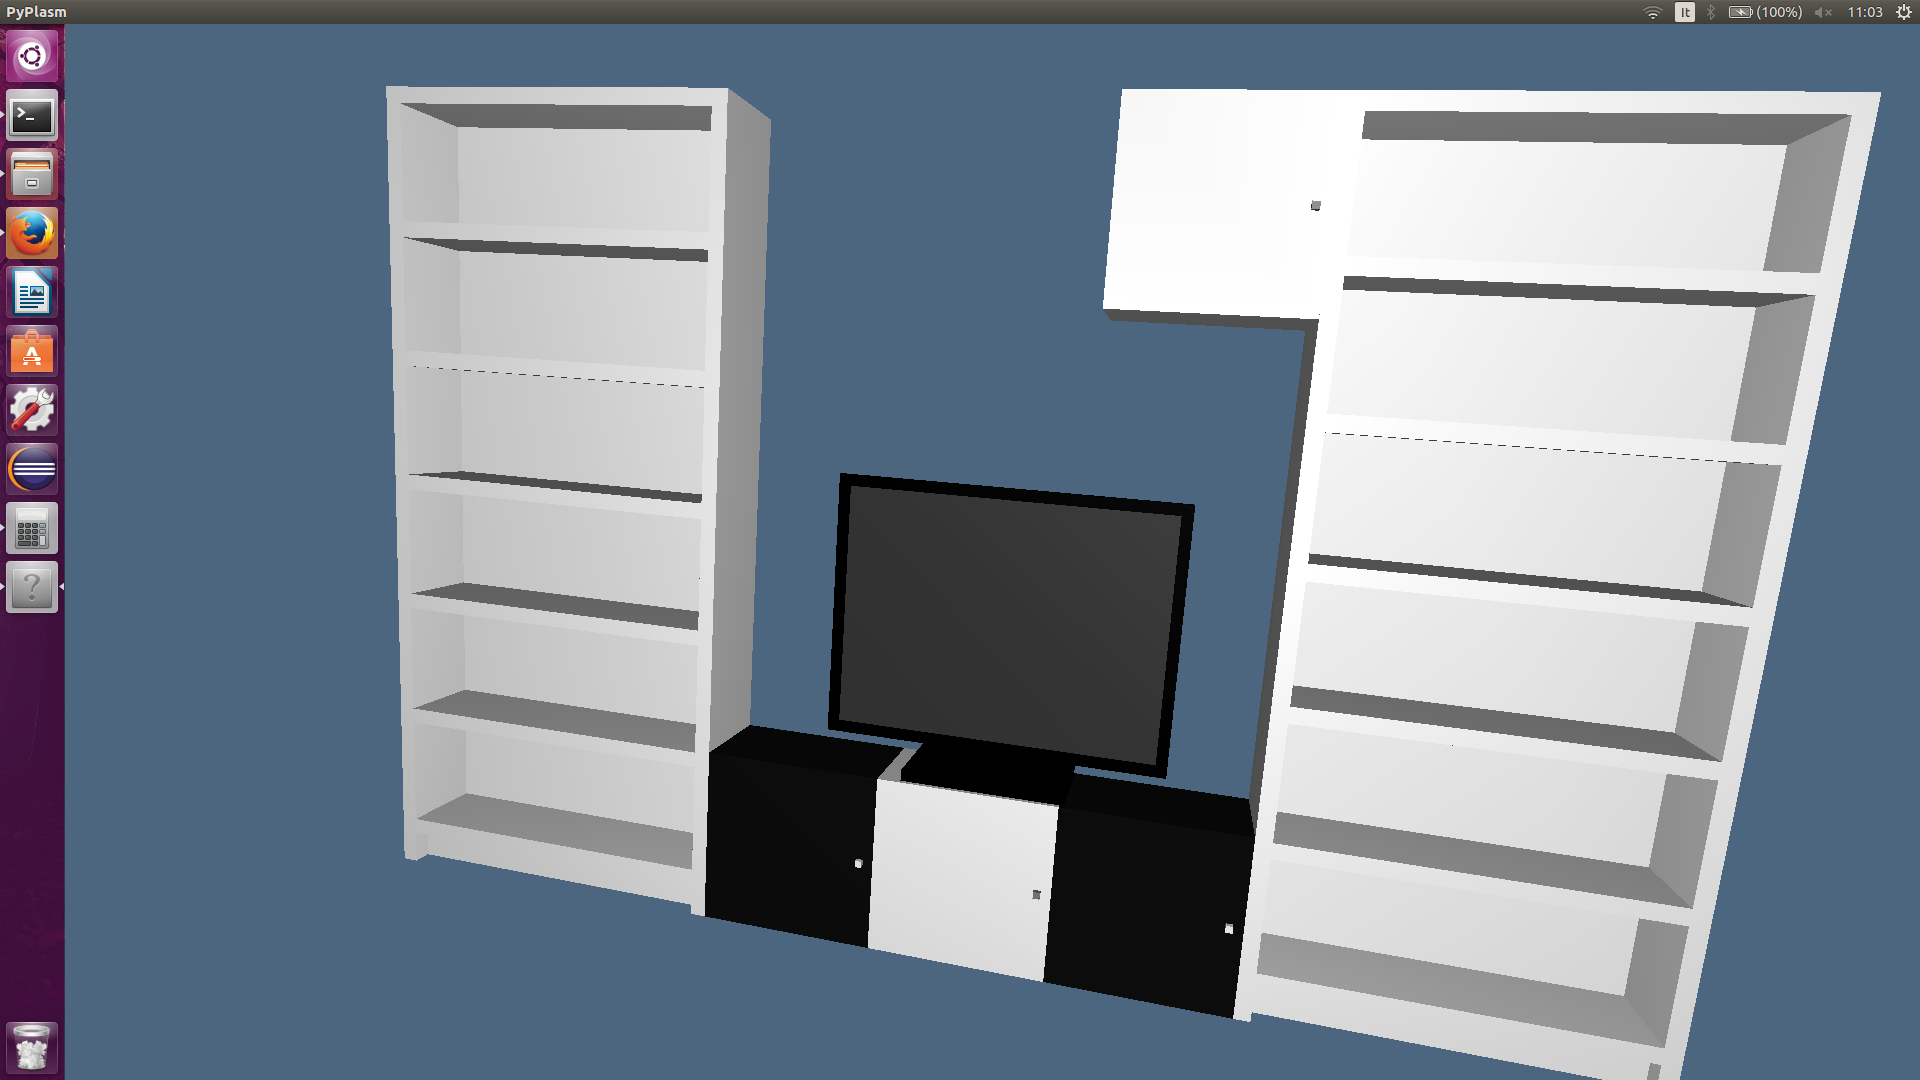